## Library

In [1]:
import math
import random
import numpy as np
import squigglepy as sq
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


In [2]:
def plot_anchor(anchor, bins=100, alpha=1, label=None):
    plt.hist(anchor, bins=bins, alpha=alpha, label=label)
    if label:
        print(label)
    pprint(sq.get_percentiles(anchor))
    print('-')
    return None


def tai_log_flop_needs(brain, efficiency, transformative_vs_human, horizon_length, scaling_exponent,
                       flops_per_param_per_sec, params=None, ref_params=11.2, ref_params_samples=12,
                       bayes_update=None):
    params_ = brain + efficiency - flops_per_param_per_sec if params is None else params
    dist = ((brain + efficiency + transformative_vs_human + horizon_length + ref_params_samples) -
            (scaling_exponent * ref_params) + (scaling_exponent * params_))
    
    if bayes_update is None:
        return dist
    else:
        return sq.dist_fn(dist, bayes_update)


@np.vectorize
def cotra_bayes_update_against_low_flop(f):
    f = f + ~sq.norm(1,3) if f < 27 and random.random() > 0.3 else f
    f = f + ~sq.norm(1,3) if f < 26 and random.random() > 0.2 else f
    f = f + ~sq.norm(1,3) if f < 25 and random.random() > 0.1 else f
    f = f + ~sq.norm(1,3) if f < 24 else f
    f = 24 if f < 24 else f
    return f


def cotra_anchor(horizon_length, bayes_update=cotra_bayes_update_against_low_flop):
    return tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                              efficiency=1,
                              transformative_vs_human=sq.norm(-2,2),
                              horizon_length=horizon_length,
                              scaling_exponent=sq.norm(0.5,1.1),
                              flops_per_param_per_sec=sq.norm(1,2),
                              bayes_update=bayes_update)


print('Loaded')

Loaded


## Cotra's Short NN Anchor

{1: 25.190868062596767,
 5: 26.395252610682597,
 10: 27.16915004618741,
 20: 28.14857405852531,
 30: 29.20916430688244,
 40: 30.407094967244728,
 50: 31.65514291476032,
 60: 32.94532907593909,
 70: 34.32408489209209,
 80: 35.99733644584817,
 90: 38.33513953400348,
 95: 40.434880228733554,
 99: 44.40264985793663}
-


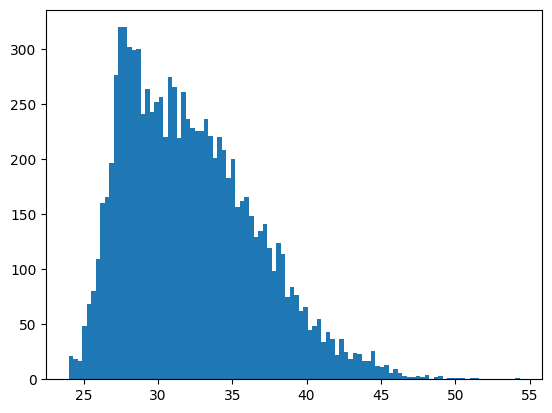

In [3]:
short_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(0,3))
plot_anchor(short_horizon_nn_anchor @ 10000)

Cotra's Short NN, Before update
{1: 21.2539685551861,
 5: 23.87876729194126,
 10: 25.585357254255495,
 20: 27.66132279270565,
 30: 29.105448153789897,
 40: 30.409742602817715,
 50: 31.6832515723643,
 60: 32.96459780299837,
 70: 34.29819264490922,
 80: 36.014813487014074,
 90: 38.41917986389144,
 95: 40.516129217099696,
 99: 44.284042382979436}
-
Cotra's Short NN, After update
{1: 25.189524215607943,
 5: 26.477088363919357,
 10: 27.2370395766713,
 20: 28.207106185593872,
 30: 29.224349995923564,
 40: 30.43906451080262,
 50: 31.71964881208717,
 60: 32.92380573441392,
 70: 34.331404708245586,
 80: 35.97928628807679,
 90: 38.39769559546143,
 95: 40.34430677177662,
 99: 44.2253327537321}
-


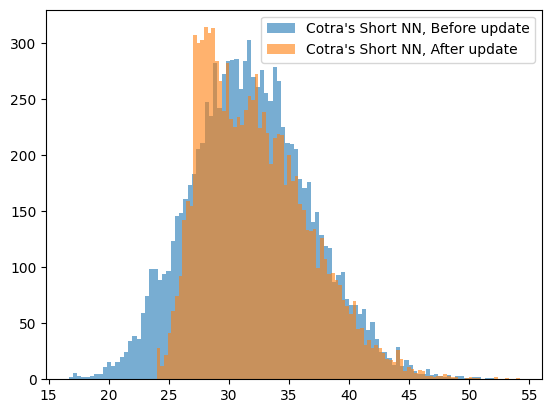

In [4]:
short_no_update = cotra_anchor(horizon_length=sq.norm(0,3), bayes_update=None)
plot_anchor(short_no_update @ 10000, alpha=0.6, label='Cotra\'s Short NN, Before update')
plot_anchor(short_horizon_nn_anchor @ 10000, alpha=0.6, label='Cotra\'s Short NN, After update')
plt.legend()

## Cotra's Medium NN Anchor

{1: 26.398200011486256,
 5: 27.797667196693872,
 10: 28.867589895298767,
 20: 30.79300397103881,
 30: 32.256054874203215,
 40: 33.53071868928238,
 50: 34.75399519045908,
 60: 36.01366521870627,
 70: 37.405181917677496,
 80: 38.98487297087869,
 90: 41.51927320167579,
 95: 43.43874616877495,
 99: 47.42596109169623}
-


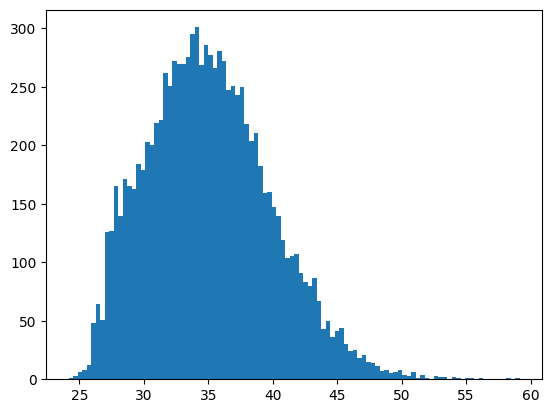

In [5]:
medium_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(3,6))
plot_anchor(medium_horizon_nn_anchor @ 10000)

## Cotra's Long NN Anchor

{1: 27.57756819458033,
 5: 30.099662251106018,
 10: 31.644265680205745,
 20: 33.65494476101171,
 30: 35.11067901384594,
 40: 36.37993976128086,
 50: 37.61823843486842,
 60: 38.90668557987573,
 70: 40.24325286436461,
 80: 41.90024409474663,
 90: 44.20709950417917,
 95: 46.334141193887234,
 99: 49.899826454802586}
-


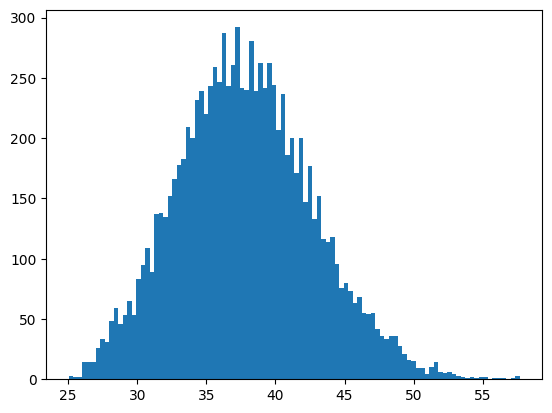

In [6]:
long_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(6,9))
plot_anchor(long_horizon_nn_anchor @ 10000)

## Cotra's GPT Anchor

{1: 24.751368586316467,
 5: 25.98278363290248,
 10: 26.621171553472234,
 20: 27.500932251646546,
 30: 28.249404826684607,
 40: 29.127614620965858,
 50: 30.316864525904418,
 60: 31.497831883596348,
 70: 32.81463940837597,
 80: 34.4040029167291,
 90: 36.76351139699573,
 95: 38.80934810412136,
 99: 42.980779172566535}
-


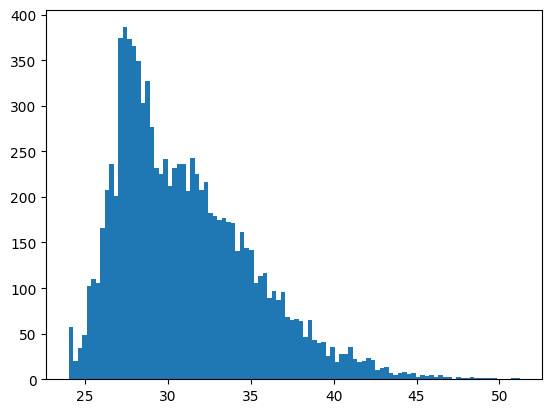

In [7]:
gpt_anchor = cotra_anchor(horizon_length=0)
plot_anchor(gpt_anchor @ 10000)

Cotra's GPT NN, Before update
{1: 19.987037416273914,
 5: 22.764302176423172,
 10: 24.331186682301436,
 20: 26.304980563302625,
 30: 27.7268604296309,
 40: 29.00762156953307,
 50: 30.16553507632447,
 60: 31.369072897810277,
 70: 32.73436983518356,
 80: 34.37933789589507,
 90: 36.56207000060122,
 95: 38.73457975771113,
 99: 42.61129399388235}
-
Cotra's GPT NN, After update
{1: 24.7046072700859,
 5: 25.926595984187703,
 10: 26.541619428530815,
 20: 27.452718155425487,
 30: 28.213352005177228,
 40: 29.10216589706389,
 50: 30.24586082565922,
 60: 31.51783736230056,
 70: 32.864938241236025,
 80: 34.526828453176584,
 90: 36.94159154083239,
 95: 38.79861614716189,
 99: 42.751711745589596}
-


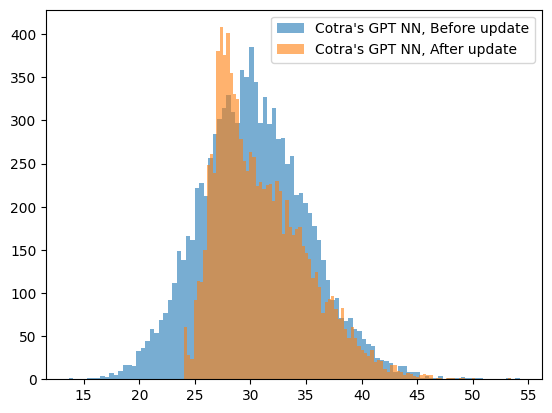

In [8]:
gpt_no_update = cotra_anchor(horizon_length=0, bayes_update=None)
plot_anchor(gpt_no_update @ 10000, alpha=0.6, label='Cotra\'s GPT NN, Before update')
plot_anchor(gpt_anchor @ 10000, alpha=0.6, label='Cotra\'s GPT NN, After update')
plt.legend()

## Cotra's Lifetime Anchor

{1: 25.1661437318016,
 5: 26.10073513721091,
 10: 26.579896598132393,
 20: 27.280089276957327,
 30: 27.777421430752593,
 40: 28.31363450642096,
 50: 28.918447421752255,
 60: 29.72861631850626,
 70: 30.753808854210497,
 80: 31.936363400821282,
 90: 33.68582338945613,
 95: 35.05290624196095,
 99: 37.717230856067616}
-


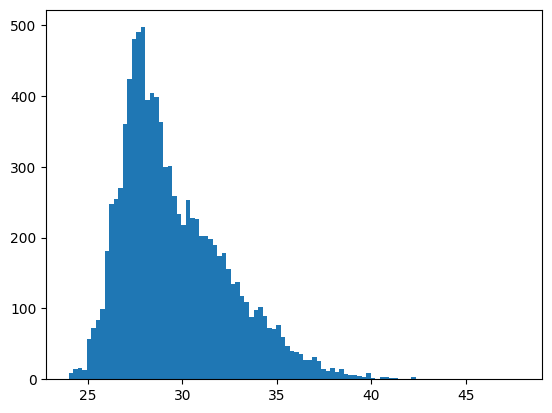

In [9]:
lifetime_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                     efficiency=sq.mixture([sq.lognorm(2,5),
                                                            sq.lognorm(5,9)]),
                                     transformative_vs_human=sq.norm(-2,2),
                                     horizon_length=9,
                                     scaling_exponent=0,
                                     flops_per_param_per_sec=0,
                                     ref_params_samples=0,
                                     bayes_update=cotra_bayes_update_against_low_flop)
plot_anchor(lifetime_anchor @ 10000)

## Cotra's Evolution Anchor

{1: 32.14907368982933,
 5: 34.70470969178751,
 10: 36.02136825338669,
 20: 37.74013572051256,
 30: 38.847715483415946,
 40: 39.85654633382507,
 50: 40.78514115606811,
 60: 41.752175631025,
 70: 42.755479926278305,
 80: 43.97565833214662,
 90: 45.5864865779757,
 95: 46.87931422597512,
 99: 49.73089337656487}
-


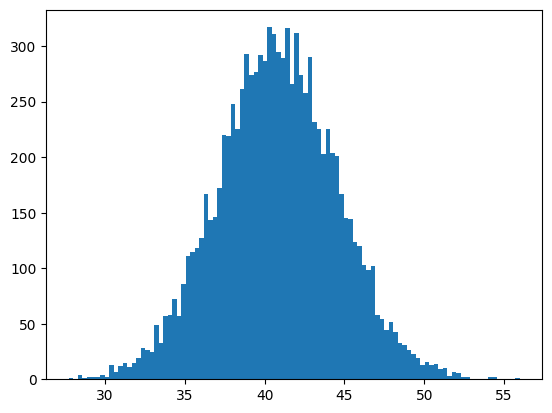

In [10]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = 16
evolution_anchor = tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                      efficiency=sq.norm(-6,5), # TODO: This seems not quite right
                                      transformative_vs_human=sq.norm(-2,2),
                                      horizon_length=log_n_individuals + evo_time_log_sec,
                                      scaling_exponent=0,
                                      flops_per_param_per_sec=0,
                                      ref_params_samples=0,
                                      bayes_update=None)
plot_anchor(evolution_anchor @ 10000)


## Cotra's Genome Anchor

{1: 26.671839878097213,
 5: 27.97168618604432,
 10: 28.987674909439225,
 20: 30.574158990082786,
 30: 31.805588781979214,
 40: 32.8007716979945,
 50: 33.821489704019314,
 60: 34.79833949742911,
 70: 35.85570866041878,
 80: 37.142585361544654,
 90: 38.97281358496137,
 95: 40.480287462194426,
 99: 43.620773583841256}
-


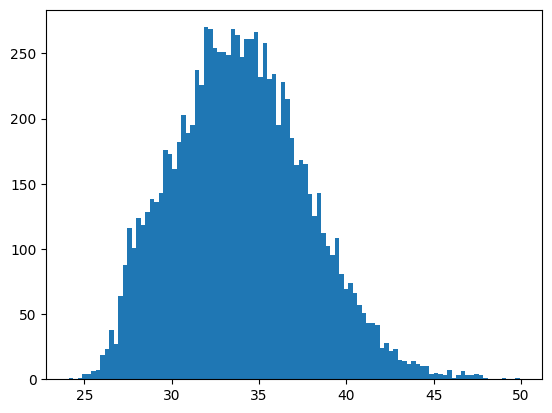

In [11]:
genome_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                   params=sq.norm(mean=8.7, sd=0.35), # There are ~10^8.7 'params' in genome
                                   efficiency=sq.norm(0,2),
                                   transformative_vs_human=sq.norm(-2,2),
                                   horizon_length=sq.norm(7,9),
                                   scaling_exponent=sq.norm(0.5,1.1),
                                   flops_per_param_per_sec=sq.norm(1,2),
                                   bayes_update=cotra_bayes_update_against_low_flop)
plot_anchor(genome_anchor @ 10000)


## All Cotra Anchors

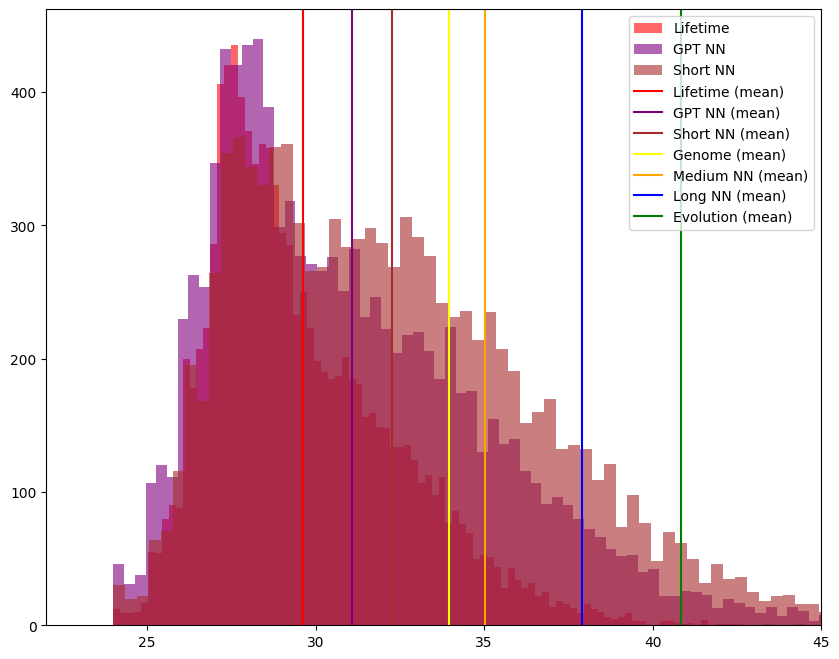

In [12]:
def plot_anchor_means():
    plt.axvline(np.mean(lifetime_anchor @ 10000), label='Lifetime (mean)', color='red')
    plt.axvline(np.mean(gpt_anchor @ 10000), label='GPT NN (mean)', color='purple')
    plt.axvline(np.mean(short_horizon_nn_anchor @ 10000), label='Short NN (mean)', color='brown')
    plt.axvline(np.mean(genome_anchor @ 10000), label='Genome (mean)', color='yellow')
    plt.axvline(np.mean(medium_horizon_nn_anchor @ 10000), label='Medium NN (mean)', color='orange')
    plt.axvline(np.mean(long_horizon_nn_anchor @ 10000), label='Long NN (mean)', color='blue')
    plt.axvline(np.mean(evolution_anchor @ 10000), label='Evolution (mean)', color='green')

    
alpha = 0.6
bins = 100

plt.figure(figsize=(10,8))
plt.hist(lifetime_anchor @ 10000, bins=bins, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor @ 10000, bins=bins, alpha=alpha, label='GPT NN', color='purple', lw=0)
plt.hist(short_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Short NN', color='brown', lw=0)
plot_anchor_means()
plt.xlim([22, 45])
plt.legend()
plt.show()

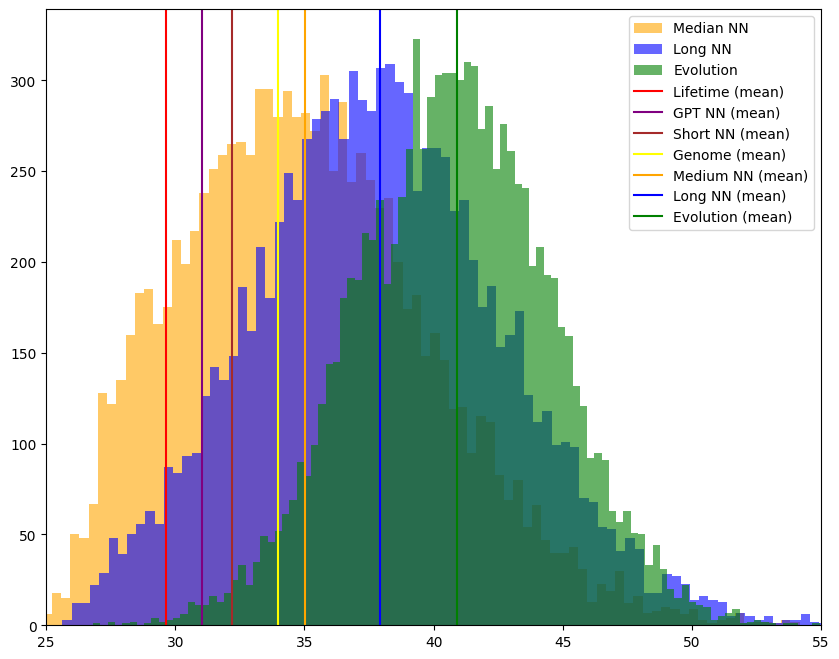

In [13]:
plt.figure(figsize=(10,8))
plt.hist(medium_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Median NN', color='orange', lw=0)
plt.hist(long_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Long NN', color='blue', lw=0)
plt.hist(evolution_anchor @ 10000, bins=bins, alpha=alpha, label='Evolution', color='green', lw=0)
plot_anchor_means()
plt.xlim([25, 55])
plt.legend()
plt.show()

## Simple Lifetime Anchor

Simple lifetime, before update
{1: 18.788592666125762,
 5: 19.977814297321117,
 10: 20.732254049784004,
 20: 21.669318207536215,
 30: 22.407621888067936,
 40: 23.063391287644293,
 50: 23.687660473196743,
 60: 24.327955664229012,
 70: 25.0442412678804,
 80: 25.920039829814634,
 90: 27.28595350486078,
 95: 28.41230911816369,
 99: 30.946714914325195}
-
Simple lifetime, after update
{1: 24.0,
 5: 24.63205069906482,
 10: 25.09625068966549,
 20: 25.552556624959397,
 30: 26.00138340114632,
 40: 26.29148271306381,
 50: 26.60992086806619,
 60: 26.95831976684966,
 70: 27.327006424417107,
 80: 27.758894666840835,
 90: 28.41747833482315,
 95: 29.01271407449831,
 99: 31.021576803894718}
-
Cotra's lifetime anchor
{1: 25.11378285988761,
 5: 26.089572155669526,
 10: 26.593196606576345,
 20: 27.29587655208437,
 30: 27.82676351543897,
 40: 28.385391212692415,
 50: 28.97669544529459,
 60: 29.71989513135854,
 70: 30.675835823832266,
 80: 31.892992392933614,
 90: 33.541423774110555,
 95: 34.91083100730523,

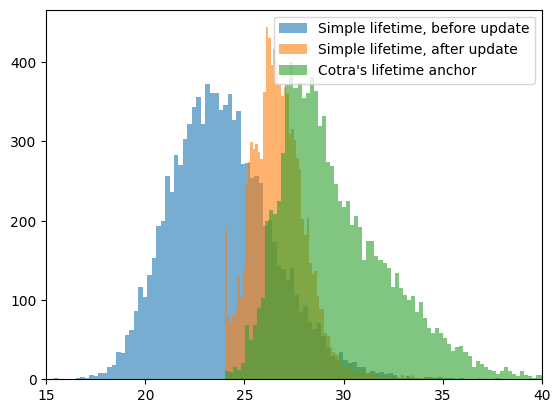

In [14]:
simple_lifetime_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                            efficiency=0,
                                            transformative_vs_human=0,
                                            horizon_length=9,
                                            scaling_exponent=0,
                                            flops_per_param_per_sec=0,
                                            ref_params_samples=0,
                                            bayes_update=cotra_bayes_update_against_low_flop)

simple_lifetime_anchor_noup = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                                 efficiency=0,
                                                 transformative_vs_human=0,
                                                 horizon_length=9,
                                                 scaling_exponent=0,
                                                 flops_per_param_per_sec=0,
                                                 ref_params_samples=0,
                                                 bayes_update=None)

plot_anchor(simple_lifetime_anchor_noup @ 10000, alpha=0.6, label='Simple lifetime, before update')
plot_anchor(simple_lifetime_anchor @ 10000, alpha=0.6, label='Simple lifetime, after update')
plot_anchor(lifetime_anchor @ 10000, alpha=0.6, label='Cotra\'s lifetime anchor')
plt.xlim([15, 40])
plt.legend()


## Updated Evolution Anchor

Cotra's evolution anchor
{1: 32.24671974851795,
 5: 34.67385323386417,
 10: 35.992972543542606,
 20: 37.67079543847612,
 30: 38.869472143287666,
 40: 39.87369220471298,
 50: 40.77892392227077,
 60: 41.766498483038134,
 70: 42.79379456442667,
 80: 43.979964430826854,
 90: 45.64121825861248,
 95: 47.080460408892435,
 99: 49.466022411450716}
-
Updated evolution anchor
{1: 32.27277943274198,
 5: 34.87795050856123,
 10: 36.279879704812856,
 20: 38.04256173496431,
 30: 39.2634178572689,
 40: 40.287553794179594,
 50: 41.29529944011499,
 60: 42.309008249813616,
 70: 43.28920695961739,
 80: 44.58617702210456,
 90: 46.45797492543109,
 95: 48.04063721778856,
 99: 50.910056277308854}
-


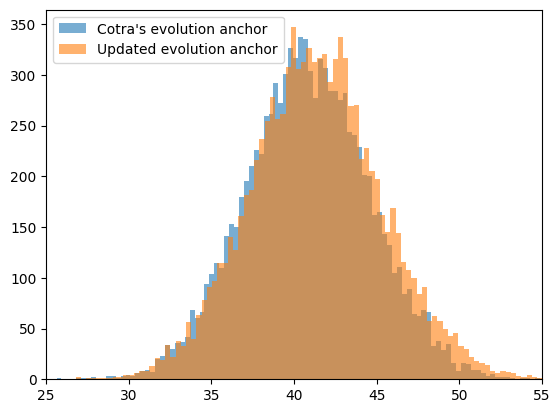

In [15]:
anthropic_adjustment = sq.norm(-1.3,1.3)
environment_adjustment = sq.mixture([[0.2, sq.lognorm(1,5)], [0.8, 0]])
    
updated_evolution_anchor = evolution_anchor + anthropic_adjustment + environment_adjustment
plot_anchor(evolution_anchor @ 10000, alpha=alpha, label='Cotra\'s evolution anchor')
plot_anchor(updated_evolution_anchor @ 10000, alpha=alpha, label='Updated evolution anchor')
plt.xlim([25, 55])
plt.legend()


## Meta-anchor

### Horizon length

{1: 0.0,
 5: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 1.5401505929678962,
 60: 2.969692010541411,
 70: 4.310412969569735,
 80: 5.791800762845309,
 90: 8.564120092110839,
 95: 9.593000736044603,
 99: 10.930310387870872}
-


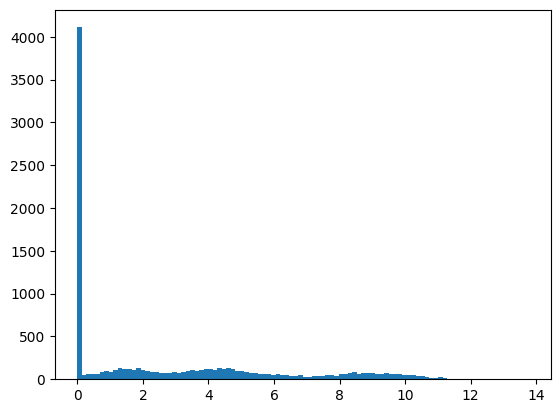

In [16]:
meta_horizon_length = sq.mixture([[0.4, 0],
                                  [0.2, sq.norm(0,3)],
                                  [0.25, sq.lognorm(3,7)],
                                  [0.15, sq.norm(7,11)]], lclip=0)

plot_anchor(meta_horizon_length @ 10000)

100%|████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 44995.01it/s]


Writing cache to file `caches/meta_anchor.sqcache.npy`...
...Cached
{1: 19.63724923334467,
 5: 24.075237899269318,
 10: 25.256382971267474,
 20: 26.89483425563567,
 30: 28.67435022348726,
 40: 30.658979466450262,
 50: 32.465619190623535,
 60: 34.42396366962843,
 70: 36.61065628850712,
 80: 39.269776073581944,
 90: 42.94780946266621,
 95: 45.92494809894404,
 99: 51.977890800303854}
-


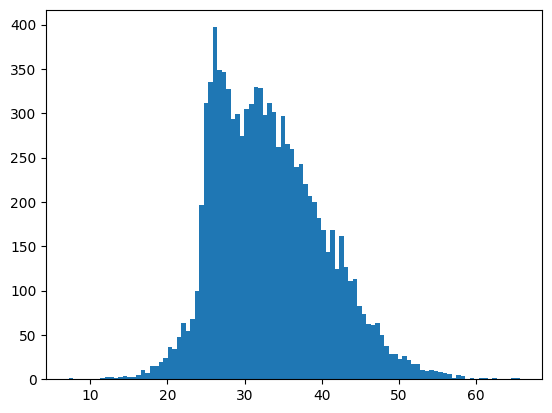

In [17]:
@np.vectorize
def peter_bayes_update_against_low_flop(f):
    f = f + sq.sample(sq.norm(1,3)) if f < 27 and random.random() > 0.9 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 26 and random.random() > 0.8 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 25 and random.random() > 0.4 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 24 and random.random() > 0.1 else f
    return f

meta_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                 efficiency=sq.norm(-1,2),
                                 transformative_vs_human=sq.norm(-2,2),
                                 horizon_length=meta_horizon_length,
                                 scaling_exponent=sq.norm(0.5,1.5),
                                 flops_per_param_per_sec=sq.norm(1,2),
                                 bayes_update=peter_bayes_update_against_low_flop)
meta_anchor_samples = sq.sample(meta_anchor, dump_cache_file='caches/meta_anchor', n=10000, verbose=True)
plot_anchor(meta_anchor_samples)


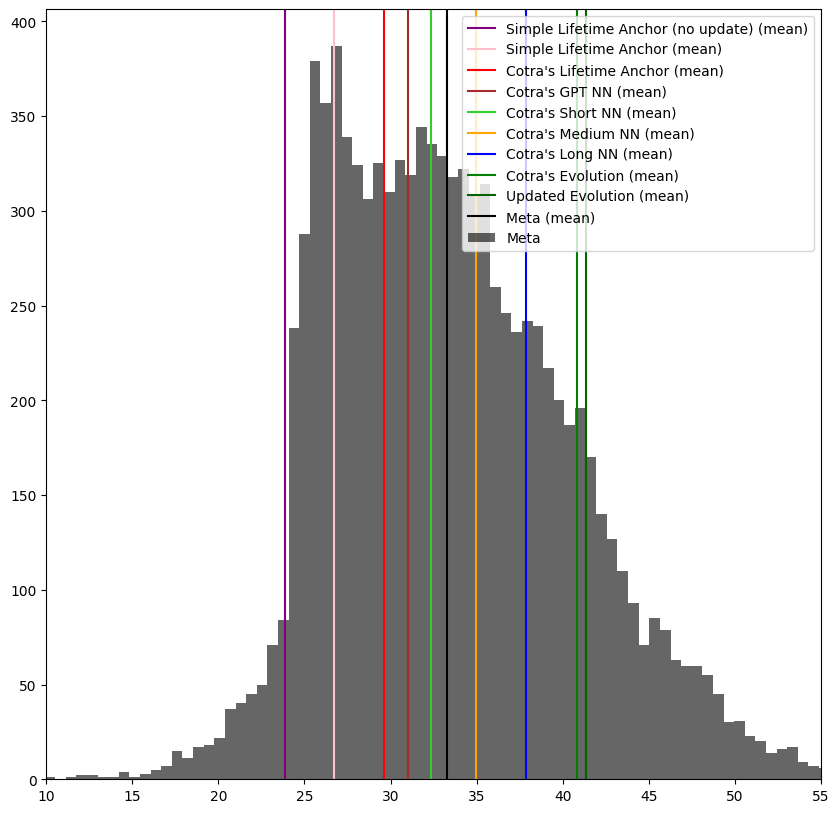

In [18]:
plt.figure(figsize=(10,10))
plt.axvline(x = np.mean(simple_lifetime_anchor_noup @ 10000), label='Simple Lifetime Anchor (no update) (mean)', color='purple')
plt.axvline(x = np.mean(simple_lifetime_anchor @ 10000), label='Simple Lifetime Anchor (mean)', color='pink')
plt.axvline(x = np.mean(lifetime_anchor @ 10000), label='Cotra\'s Lifetime Anchor (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor @ 10000), label='Cotra\'s GPT NN (mean)', color='brown')
plt.axvline(x = np.mean(short_horizon_nn_anchor @ 10000), label='Cotra\'s Short NN (mean)', color='limegreen')
plt.axvline(x = np.mean(medium_horizon_nn_anchor @ 10000), label='Cotra\'s Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor @ 10000), label='Cotra\'s Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor @ 10000), label='Cotra\'s Evolution (mean)', color='green')
plt.axvline(x = np.mean(updated_evolution_anchor @ 10000), label='Updated Evolution (mean)', color='darkgreen')
plt.axvline(x = np.mean(meta_anchor @ 10000), label='Meta (mean)', color='black')
plt.hist(meta_anchor @ 10000, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.xlim([10, 55])
plt.legend()
plt.show()

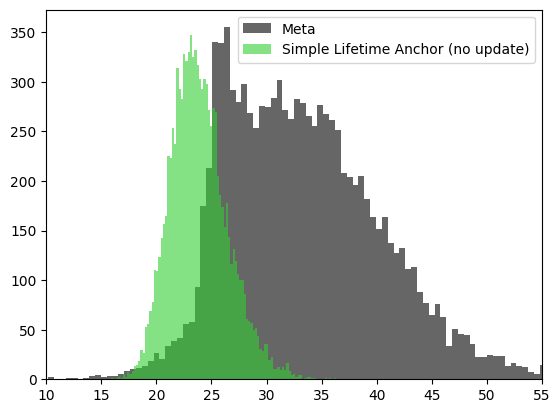

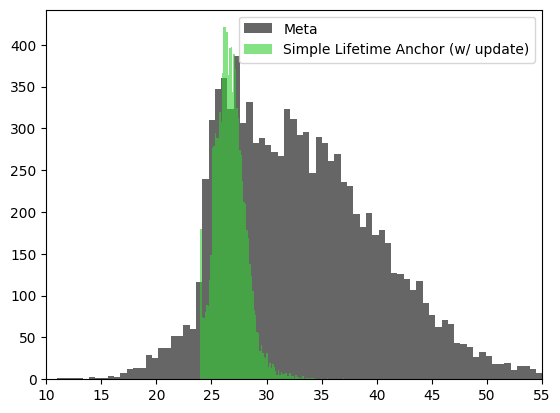

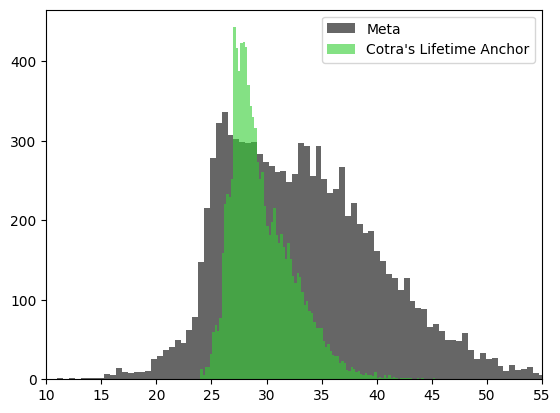

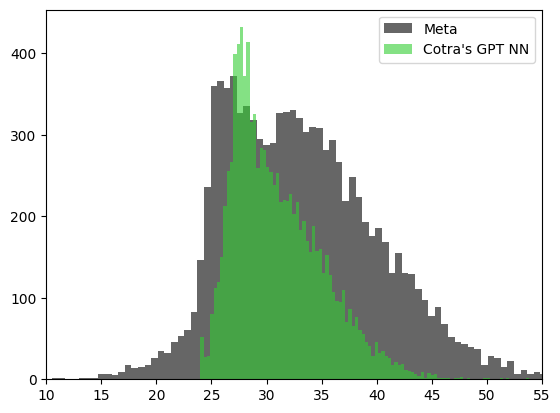

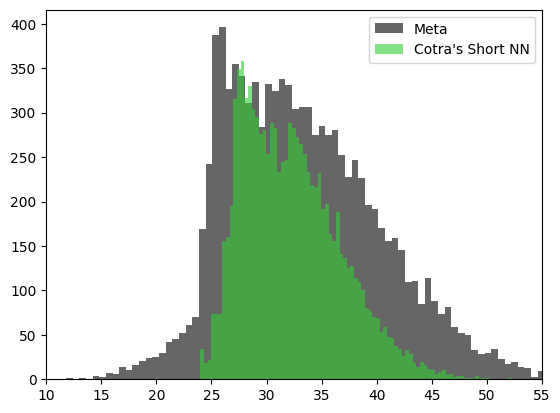

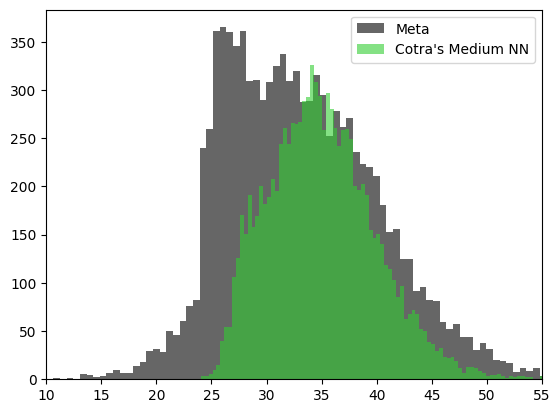

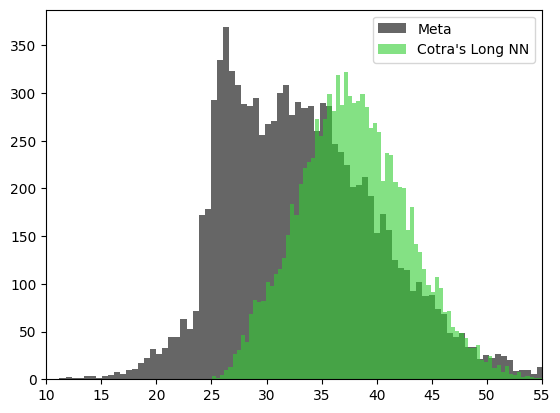

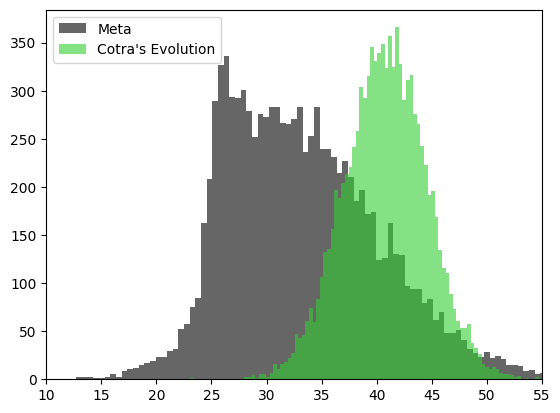

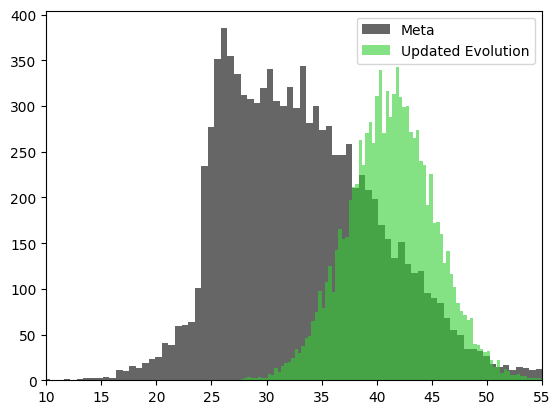

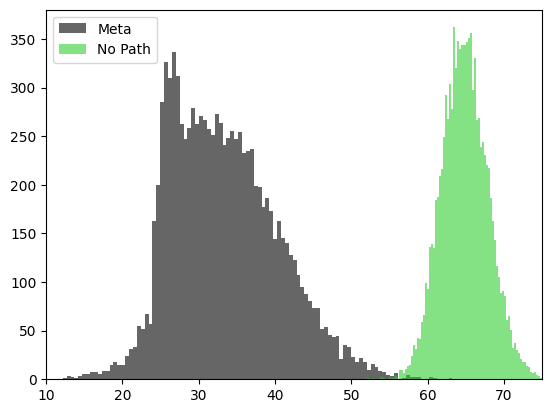

In [19]:
no_path_anchor = sq.lognorm(60,70)

for anchors in [[simple_lifetime_anchor_noup @ 10000, 'Simple Lifetime Anchor (no update)'],
                [simple_lifetime_anchor @ 10000, 'Simple Lifetime Anchor (w/ update)'],
                [lifetime_anchor @ 10000, 'Cotra\'s Lifetime Anchor'],
                [gpt_anchor @ 10000, 'Cotra\'s GPT NN'],
                [short_horizon_nn_anchor @ 10000, 'Cotra\'s Short NN'],
                [medium_horizon_nn_anchor @ 10000, 'Cotra\'s Medium NN'],
                [long_horizon_nn_anchor @ 10000, 'Cotra\'s Long NN'],
                [evolution_anchor @ 10000, 'Cotra\'s Evolution'],
                [updated_evolution_anchor @ 10000, 'Updated Evolution'],
                [no_path_anchor @ 10000, 'No Path']]:
    plt.hist(meta_anchor @ 10000, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
    plt.hist(anchors[0], bins=bins, alpha=alpha, label=anchors[1], color='limegreen', lw=0)
    plt.xlim([10, 75 if anchors[1] == 'No Path' else 55])
    plt.legend()
    plt.show()

100%|█████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1722.30it/s]


Writing cache to file `caches/cotra_2020.sqcache.npy`...
...Cached
{1: 26.032103742126733,
 5: 27.335596191983917,
 10: 28.318965945827912,
 20: 30.379677841053375,
 30: 32.073598326568636,
 40: 33.72760597471229,
 50: 35.21697937934425,
 60: 36.83566323019507,
 70: 38.67528279115364,
 80: 41.15368729675208,
 90: 45.277892817052134,
 95: 62.9151799517479,
 99: 68.01535777529145}
-


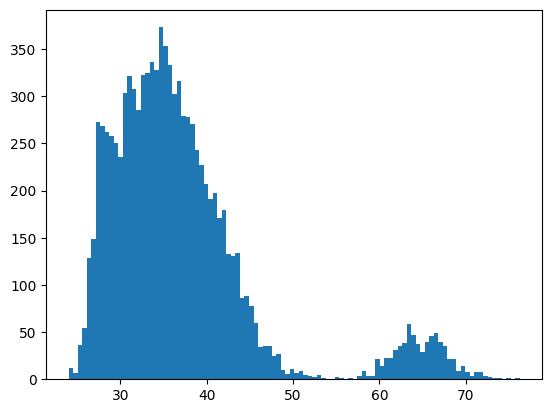

In [20]:
cotra_2020 = sq.mixture([[0.052, lifetime_anchor],
                         [0.21, short_horizon_nn_anchor],
                         [0.11, genome_anchor],
                         [0.312, medium_horizon_nn_anchor],
                         [0.155, long_horizon_nn_anchor],
                         [0.091, evolution_anchor],
                         [0.07, no_path_anchor]])
cotra_2020_samples = sq.sample(cotra_2020, dump_cache_file='caches/cotra_2020', n=10000, verbose=True)
plot_anchor(cotra_2020_samples)


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1625.68it/s]


Writing cache to file `caches/cotra_2022.sqcache.npy`...
...Cached
{1: 25.592020346697065,
 5: 27.04734739822383,
 10: 27.847378338303667,
 20: 29.496462338145836,
 30: 31.159949516181985,
 40: 32.59161968419759,
 50: 34.02792304347467,
 60: 35.42253943480338,
 70: 37.054415315201084,
 80: 39.23183930986699,
 90: 42.95003064608778,
 95: 55.585976134729776,
 99: 67.59931956658264}
-


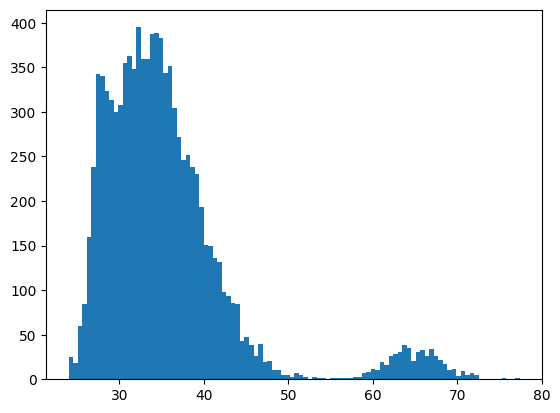

In [21]:
cotra_2022 = sq.mixture([[0.1, gpt_anchor],
                         [0.33, short_horizon_nn_anchor],
                         [0.09, genome_anchor],
                         [0.34, medium_horizon_nn_anchor],
                         [0.04, long_horizon_nn_anchor],
                         [0.05, evolution_anchor],
                         [0.05, no_path_anchor]])
cotra_2022_samples = sq.sample(cotra_2022, dump_cache_file='caches/cotra_2022', n=10000, verbose=True)
plot_anchor(cotra_2022_samples)


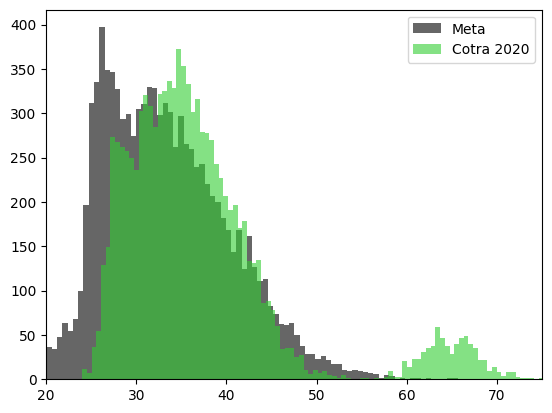

In [22]:
plt.hist(meta_anchor_samples, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(cotra_2020_samples, bins=bins, alpha=alpha, label='Cotra 2020', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()


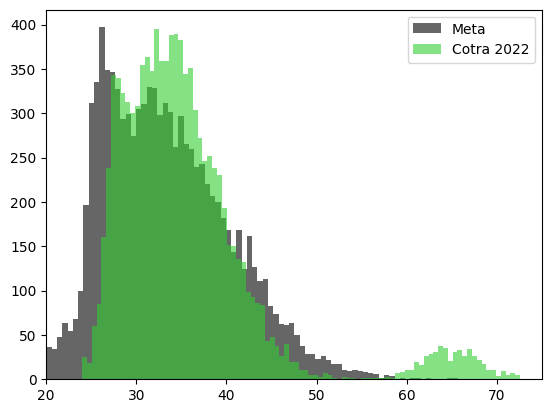

In [23]:
plt.hist(meta_anchor_samples, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(cotra_2022_samples, bins=bins, alpha=alpha, label='Cotra 2022', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()


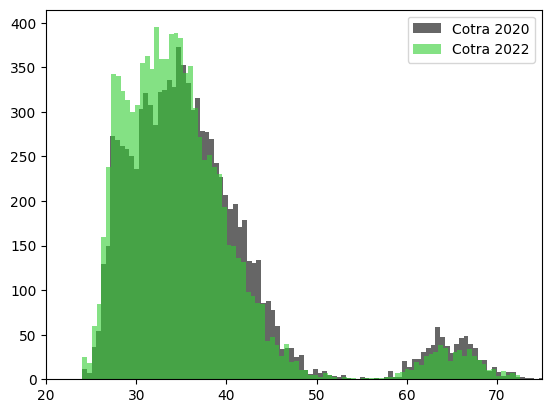

In [24]:
plt.hist(cotra_2020_samples, bins=bins, alpha=alpha, label='Cotra 2020', color='black', lw=0)
plt.hist(cotra_2022_samples, bins=bins, alpha=alpha, label='Cotra 2022', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()
